# New York MTA Advertisement Billboards Exploratory Data Analysis

Abullah AlHuwaishel and Omran Fallatah

#### Problem Statement

- Tasked with finding the optimal location for advertisment billboards around New York MTA Stations.
- Used NYC MTA and demographic data to perform analysis on areas with high traffic and each clients targeted demographic.
- Our Results show major traffic hubs and the demographic surrounding that hub which is presented to our clients.

#### Import Data

In [1]:
# first we import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime as dt
import matplotlib.pyplot as plt



In [2]:
# Source: http://web.mta.info/developers/turnstile.html
turnstiles = pd.read_csv('Turnstiles21-01_21-10.csv')

In [9]:
turnstiles.columns

Index(['Unnamed: 0', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'Entry_Increment',
       'Exits_Increment', 'Traffic_Total'],
      dtype='object')

In [4]:
turnstiles.describe()

,Unnamed: 0,ENTRIES,EXITS
count,8.375005e+06,8.375005e+06,8.375005e+06
mean,1.046878e+05,4.187254e+07,3.361740e+07
std,6.044269e+04,2.185558e+08,1.932852e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.234300e+04,2.207770e+05,9.681200e+04
50%,1.046870e+05,1.444568e+06,8.722880e+05
75%,1.570310e+05,6.096334e+06,4.022572e+06
max,2.104320e+05,2.147432e+09,2.133797e+09


In [ ]:
# the EXITS column has a lot of trailing white and would cause errors down the line
#turnstiles.rename(columns = {'EXITS                                                               ':'EXITS'}, inplace = True)
#this is a very caveman way of doing it but it gets done -_-
turnstiles.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [12]:
# parse spaces from columns  
turnstiles.rename(columns=lambda x: x.strip())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,13.0,1.0,14.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,9.0,24.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,35.0,49.0,84.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,130.0,32.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,04:00:00,REGULAR,5554,541,0.0,0.0,0.0
8375001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,08:00:00,REGULAR,5554,541,0.0,0.0,0.0
8375002,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,12:00:00,REGULAR,5554,541,0.0,0.0,0.0
8375003,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2021,16:00:00,REGULAR,5554,541,0.0,0.0,0.0


In [11]:
#check the dataframe data types 
turnstiles.dtypes

C/A                 object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES              int64
EXITS                int64
Entry_Increment    float64
Exits_Increment    float64
Traffic_Total      float64
dtype: object

In [18]:
#Checking for NaN values
turnstiles.isna().values.any()

False

#### Process Data

In [14]:
turnstiles['Entry_Increment'] = abs(turnstiles.ENTRIES.diff())
turnstiles['Exits_Increment'] = abs(turnstiles.EXITS.diff())
turnstiles['Traffic_Total'] = np.add(turnstiles.Entry_Increment, turnstiles.Exits_Increment)

In [15]:
turnstiles.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,00:00:00,REGULAR,7641078,2615082,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,13.0,1.0,14.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,9.0,24.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,35.0,49.0,84.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,130.0,32.0,162.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,20:00:00,REGULAR,7641437,2615217,172.0,29.0,201.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,00:00:00,REGULAR,7641505,2615230,68.0,13.0,81.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,04:00:00,REGULAR,7641516,2615233,11.0,3.0,14.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,08:00:00,REGULAR,7641526,2615246,10.0,13.0,23.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2021,12:00:00,REGULAR,7641583,2615274,57.0,28.0,85.0


In [16]:
# filter outliers above specified quantile
quant_filt = 0.99
q = turnstiles["Entry_Increment"].quantile(quant_filt)
turnstiles = turnstiles[turnstiles["Entry_Increment"] < q]

r = turnstiles["Exits_Increment"].quantile(quant_filt)
turnstiles = turnstiles[turnstiles["Exits_Increment"] < r]

s = turnstiles["Traffic_Total"].quantile(quant_filt)
turnstiles = turnstiles[turnstiles["Traffic_Total"] < s]

turnstiles = turnstiles.dropna() # apparently no issues with NaN cells; running as best practice

turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,04:00:00,REGULAR,7641091,2615083,13.0,1.0,14.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,08:00:00,REGULAR,7641100,2615107,9.0,24.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,12:00:00,REGULAR,7641135,2615156,35.0,49.0,84.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,16:00:00,REGULAR,7641265,2615188,130.0,32.0,162.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/25/2021,20:00:00,REGULAR,7641437,2615217,172.0,29.0,201.0


In [17]:
# Checking maximum increment per 4 hours to check how realistic our calculations are,
# the maximum entry increment is 761 people per 4 hours.
# which translates to 3 people per minute which is an acceptable number
turnstiles['Entry_Increment'].max()

761.0

In [19]:
data_stn = turnstiles.groupby(["STATION"]).sum() # sort by station

In [20]:
data_stn['Station_ID'] = data_stn.index # Make Station_ID a non-index column
data_stn = data_stn.sort_values(['Traffic_Total'], ascending=[False]) # Sort stations by traffic
data_stn['Idx'] = np.arange(data_stn.shape[0]) # add enumerated column
data_stn = data_stn.set_index('Idx') # assign enumerated column as index column
data_stn.head()

,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total,Station_ID
Idx,,,,,,
0,7731245739475,8469095175735,9797926.0,12477488.0,22275414.0,34 ST-PENN STA
1,1588343826398,2588904833946,6915786.0,8179826.0,15095612.0,86 ST
2,5168226583243,6253939088433,6553769.0,8148549.0,14702318.0,34 ST-HERALD SQ
3,9395044648436,9451216086258,6781715.0,7698221.0,14479936.0,23 ST
4,3629918264598,3697243423910,5921551.0,8237261.0,14158812.0,GRD CNTRL-42 ST


In [21]:
sns.set_style("whitegrid")

data_stn = data_stn.iloc[:20,:] # limit to 20 most active stations
data_stn.head()

,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total,Station_ID
Idx,,,,,,
0,7731245739475,8469095175735,9797926.0,12477488.0,22275414.0,34 ST-PENN STA
1,1588343826398,2588904833946,6915786.0,8179826.0,15095612.0,86 ST
2,5168226583243,6253939088433,6553769.0,8148549.0,14702318.0,34 ST-HERALD SQ
3,9395044648436,9451216086258,6781715.0,7698221.0,14479936.0,23 ST
4,3629918264598,3697243423910,5921551.0,8237261.0,14158812.0,GRD CNTRL-42 ST


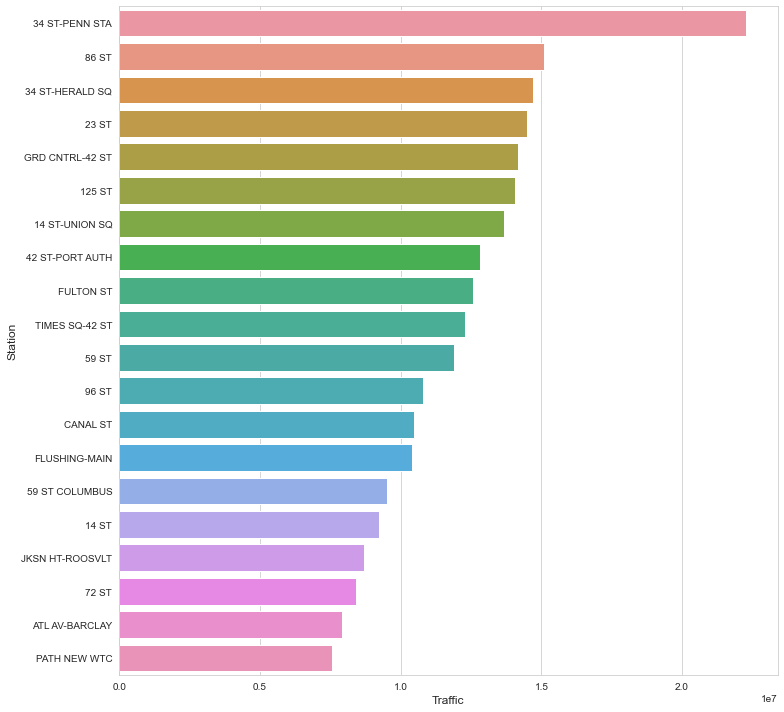

In [23]:
# verify results: check http://web.mta.info/nyct/facts/ffsubway.htm
ax = sns.barplot(x="Traffic_Total", y='Station_ID', data=data_stn)
plt.rcParams["figure.figsize"] = (11,10)
plt.xlabel('Traffic', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
#plt.savefig('charts/Top20.png')
plt.show()

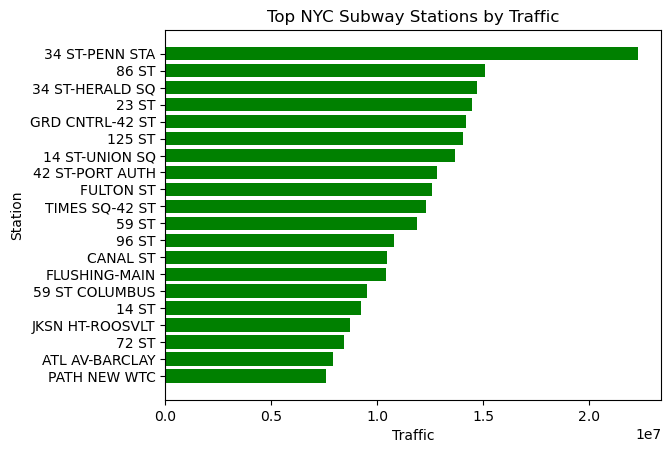

In [24]:
y = pd.Series(data_stn['Station_ID'])
x = pd.Series(data_stn['Traffic_Total'])

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y, x, align='center',
        color='green', ecolor='black')
ax.set_yticks(y)
ax.set_yticklabels(y)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Traffic')
ax.set_ylabel('Station')
ax.set_title('Top NYC Subway Stations by Traffic')

plt.show()

In [25]:
turnstiles_date = turnstiles.groupby(["DATE"]).sum() # sort by station and date
turnstiles_date.reset_index(inplace=True) # remove Station and Date columns from Index
turnstiles_date['Date'] = pd.to_datetime(turnstiles_date['DATE']) # change Date dtype to datetime
turnstiles_date.head()

,DATE,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total,Date
0,01/01/2021,1270241162483,1031689487740,601956.0,719974.0,1321930.0,2021-01-01
1,01/02/2021,1057271211693,858625630214,868890.0,965255.0,1834145.0,2021-01-02
2,01/03/2021,1265325761695,1025101767352,627692.0,742580.0,1370272.0,2021-01-03
3,01/04/2021,1257543588466,1015950752820,1448940.0,1458699.0,2907639.0,2021-01-04
4,01/05/2021,1255066417754,1013338334550,1501920.0,1506317.0,3008237.0,2021-01-05


In [27]:
turnstiles_date['DATE'] = pd.to_datetime(turnstiles_date['DATE'])

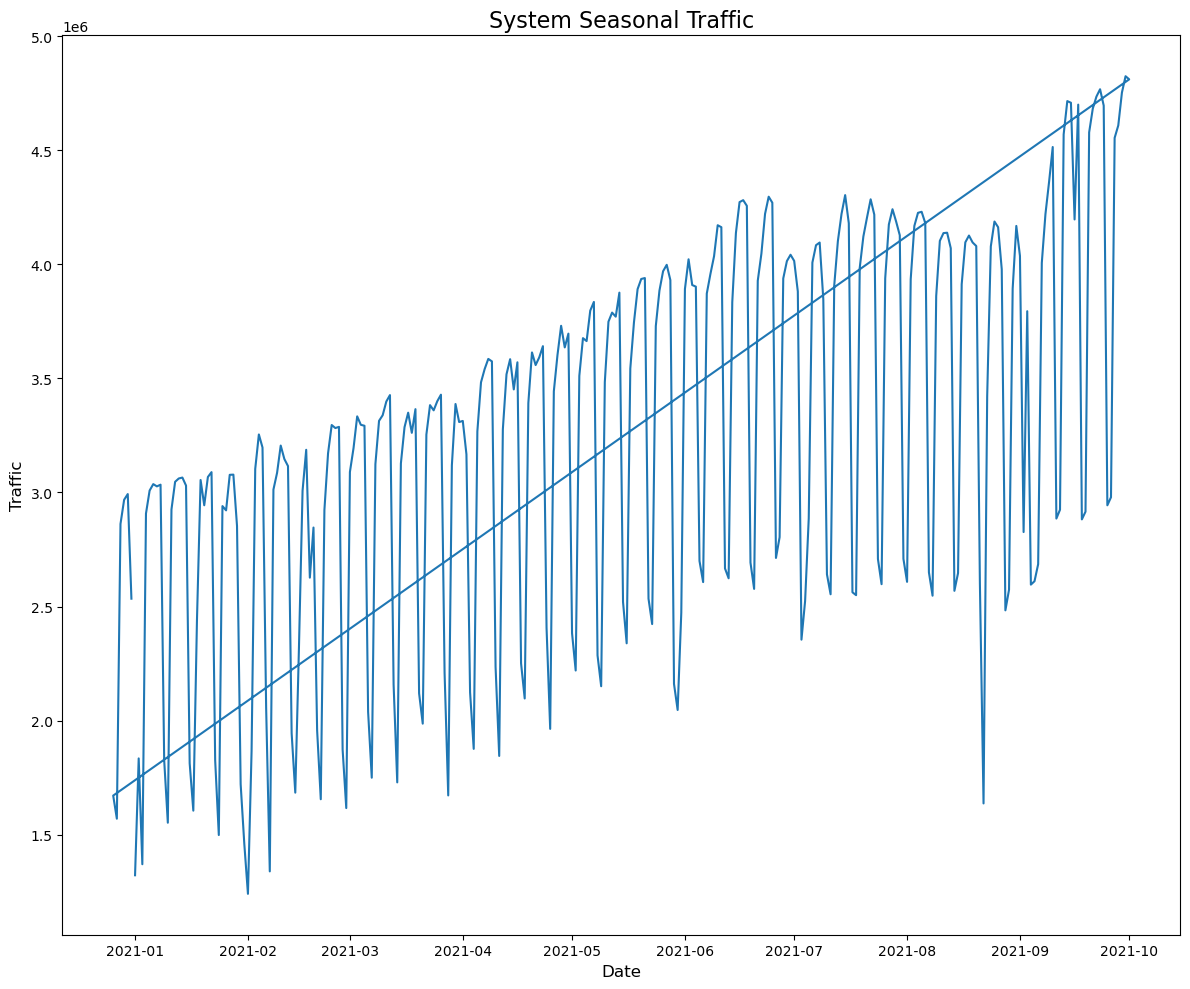

In [29]:
y = pd.Series(turnstiles_date['Traffic_Total'])
x = pd.Series(turnstiles_date['DATE'])

plt.plot(x,y)
plt.rcParams["figure.figsize"] = (12,10)
plt.title("System Seasonal Traffic",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.tight_layout()
#plt.savefig('charts/SystemTraffic.png')
plt.show()

In [30]:
data_stndate = turnstiles.groupby(["STATION", "DATE"]).sum() # sort by station and date
data_stndate.reset_index(inplace=True) # remove Station and Date columns from Index
data_stndate['DATE'] = pd.to_datetime(data_stndate['DATE']) # change Date dtype to datetime
data_stndate.head()

,STATION,DATE,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total
0,1 AV,2021-01-01,2777518471,2797113963,2152.0,3676.0,5828.0
1,1 AV,2021-01-02,2314613743,2330954260,3608.0,5945.0,9553.0
2,1 AV,2021-01-03,2777554284,2797174824,2547.0,4537.0,7084.0
3,1 AV,2021-01-04,2777576215,2797214643,5303.0,8145.0,13448.0
4,1 AV,2021-01-05,2777608478,2797264170,5468.0,8332.0,13800.0


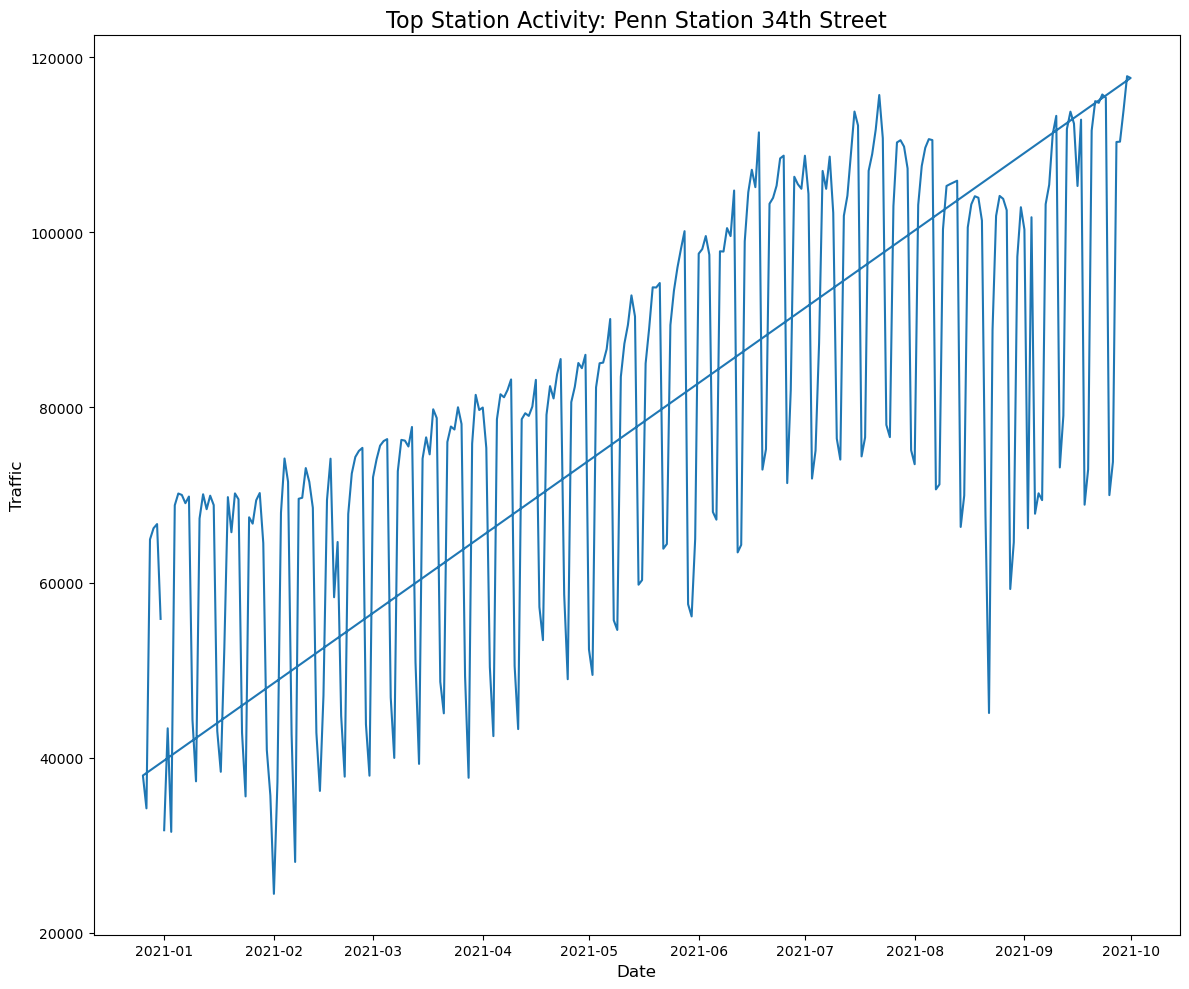

In [31]:
data_Penn = data_stndate[data_stndate['STATION'] == '34 ST-PENN STA'] # filter to date by specific station

y = pd.Series(data_Penn['Traffic_Total'])
x = pd.Series(data_Penn['DATE'])

plt.plot(x,y)
plt.rcParams["figure.figsize"] = (12,10)
plt.title("Top Station Activity: Penn Station 34th Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.tight_layout()
#plt.savefig('charts/Penn.png')
plt.show()

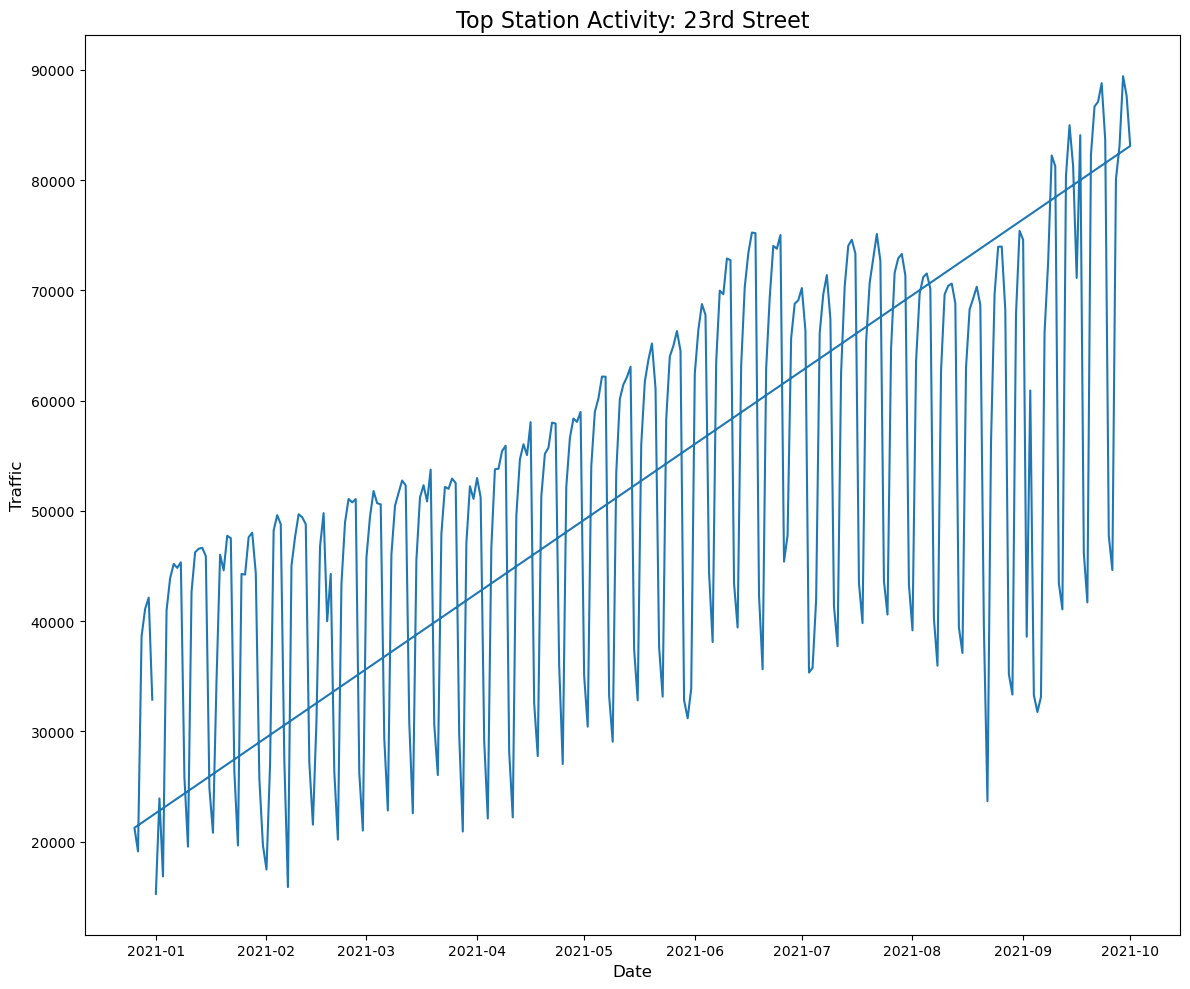

In [32]:
data_23ST = data_stndate[data_stndate['STATION'] == '23 ST']

y = pd.Series(data_23ST['Traffic_Total'])
x = pd.Series(data_23ST['DATE'])
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(x,y)
plt.title("Top Station Activity: 23rd Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.tight_layout()
plt.savefig('charts/23RD.png')
plt.show()

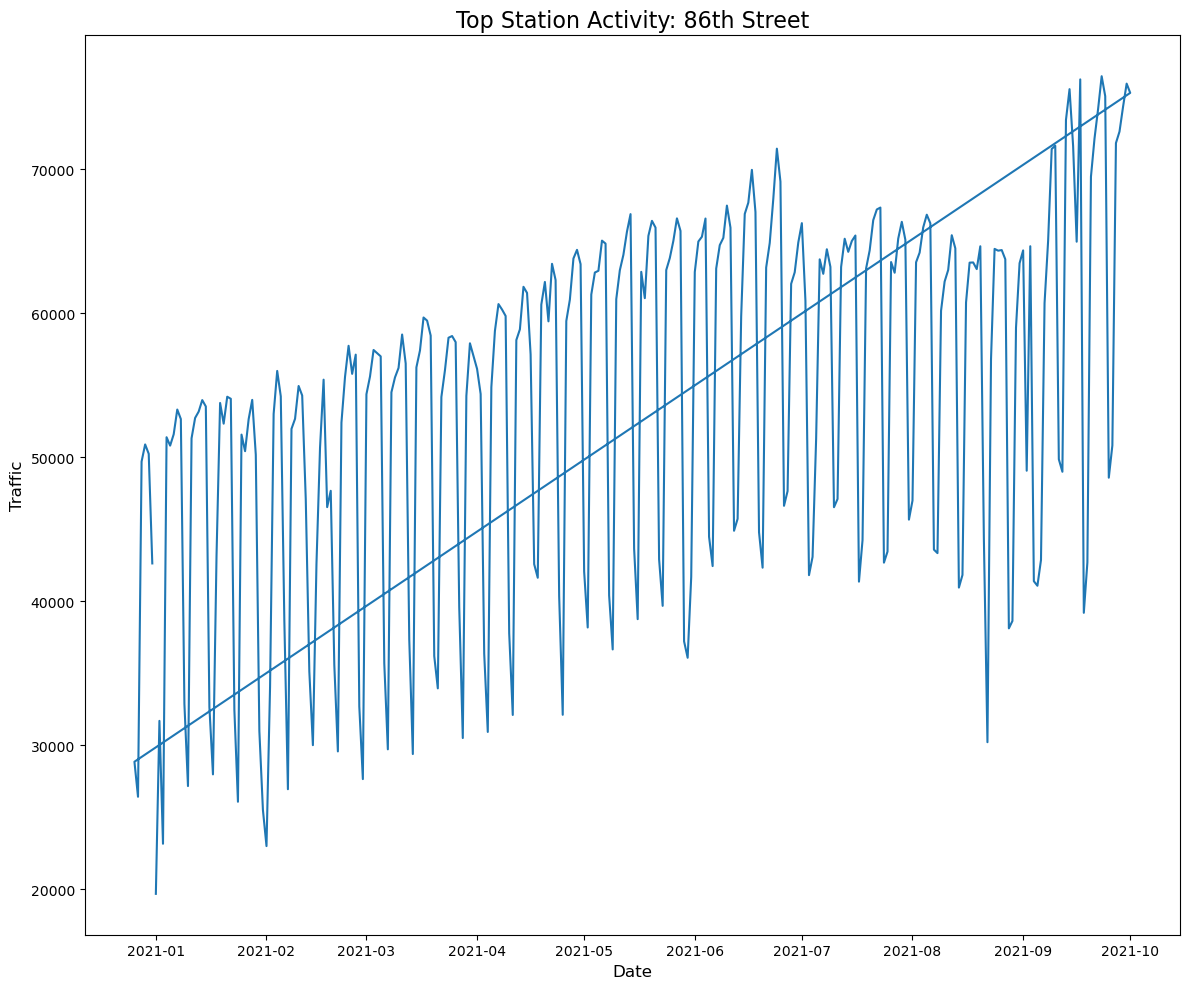

In [33]:
data_23ST = data_stndate[data_stndate['STATION'] == '86 ST']

y = pd.Series(data_23ST['Traffic_Total'])
x = pd.Series(data_23ST['DATE'])
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(x,y)
plt.title("Top Station Activity: 86th Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.tight_layout()
#plt.savefig('charts/86th.png')
plt.show()

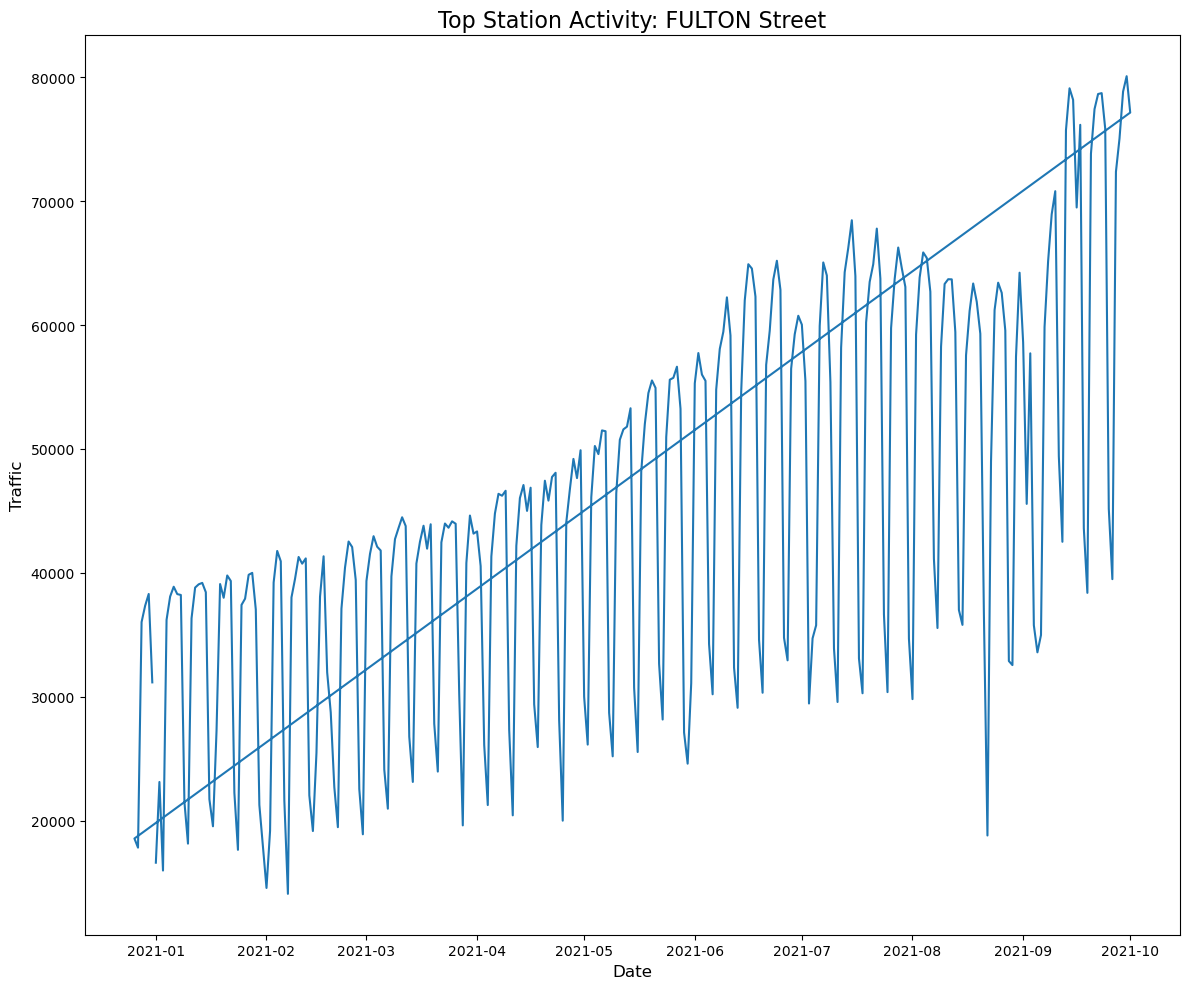

In [34]:
data_FULST = data_stndate[data_stndate['STATION'] == 'FULTON ST']

y = pd.Series(data_FULST['Traffic_Total'])
x = pd.Series(data_FULST['DATE'])
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(x,y)
plt.title("Top Station Activity: FULTON Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.tight_layout()
#plt.savefig('charts/FULTON.png')
plt.show()

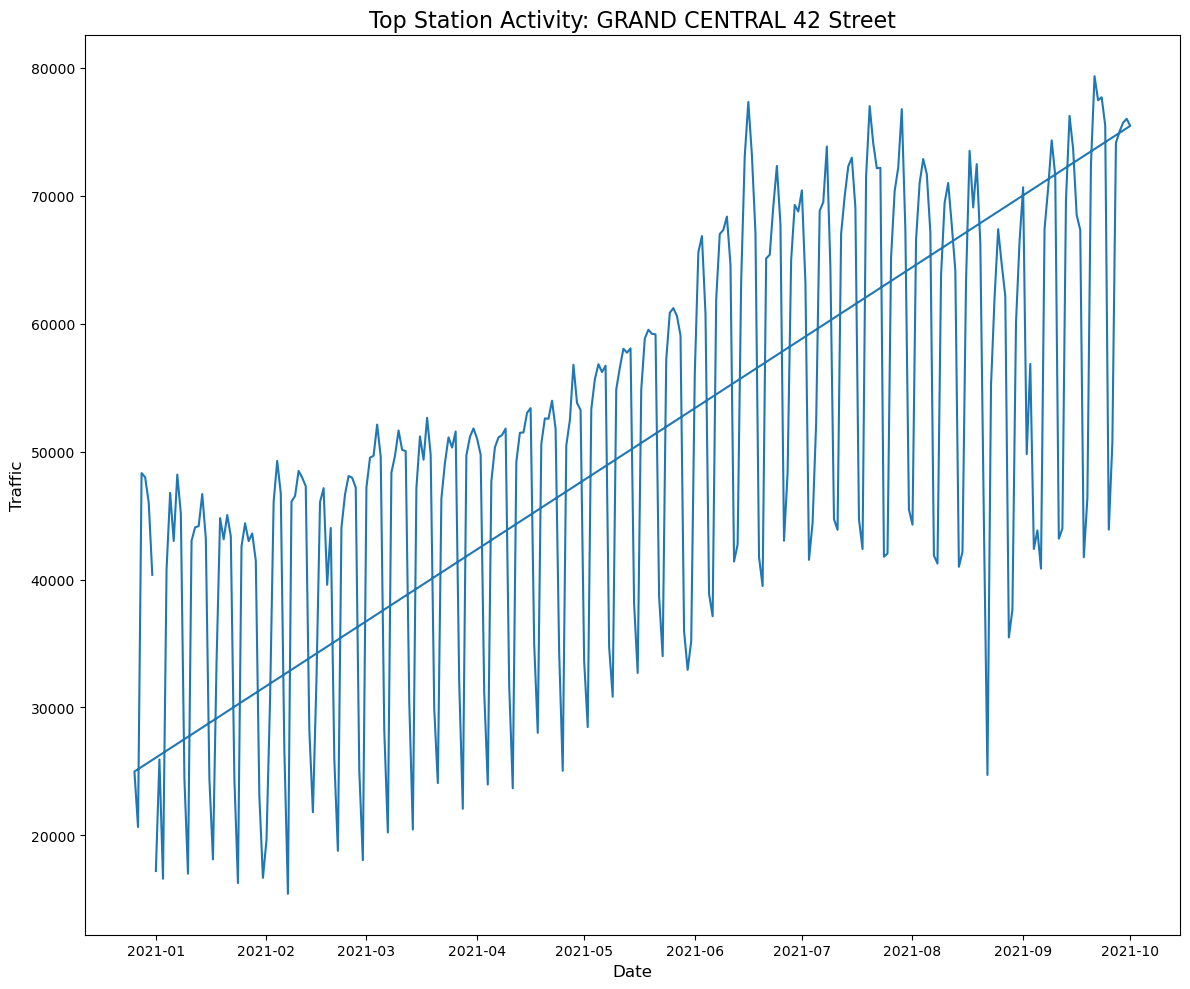

In [35]:
data_GRD42ST = data_stndate[data_stndate['STATION'] == 'GRD CNTRL-42 ST']

y = pd.Series(data_GRD42ST['Traffic_Total'])
x = pd.Series(data_GRD42ST['DATE'])
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(x,y)
plt.title("Top Station Activity: GRAND CENTRAL 42 Street",fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Traffic', fontsize=12)
plt.tight_layout()
#plt.savefig('charts/86th.png')
plt.show()

# Demographic analysis

Demographic
Data sourced from : https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/data

census_block_loc.csv was orginally sourced from: https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

total population, racial/ethnic demographic information, employment and commuting characteristics, and more are contained here nyc_census_tracts.csv was originally sourced from: https://www.fcc.gov/general/census-block-conversions-api

This file contains the coordinates and associated census block codes along with the state and county names

In [38]:
blocks_map = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv', index_col=0)

In [37]:
blocks_map.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [39]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2


In [40]:
census.County.unique()

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], dtype=object)

In [41]:
blocks_map = blocks_map[blocks_map.County.isin(['Bronx','Kings','New York','Queens', 'Richmond'])]
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map = blocks_map.merge(census,how='left',right_index=True,left_on='Tract')

blocks_map.describe()

,Latitude,Longitude,BlockCode,Tract,TotalPop,Men,Women,Hispanic,White,Black,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
count,18053.000000,18053.000000,1.805300e+04,1.805300e+04,18052.000000,18052.000000,18052.000000,12999.000000,12999.000000,12999.000000,...,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,12777.000000,11864.000000,12830.000000
mean,40.663945,-73.938191,3.606427e+14,3.606427e+10,2911.090682,1411.314591,1499.776091,23.607047,42.815132,19.688084,...,7.094138,9.226329,36.102348,6.237176,44.844486,6.684503,1.955193,4.175033,41.353911,8.783001
std,0.108223,0.130486,2.647918e+11,2.647918e+07,2963.959357,1433.417834,1570.619628,21.308169,33.096275,27.271547,...,5.410675,9.528540,21.883308,4.791517,20.761257,9.074818,3.704082,7.743335,6.959058,8.350183
min,40.480000,-74.257839,3.600500e+14,3.600500e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.200000,0.000000
25%,40.572714,-74.020402,3.604707e+14,3.604707e+10,0.000000,0.000000,0.000000,7.700000,8.300000,0.900000,...,3.500000,4.700000,16.000000,2.500000,27.200000,1.200000,0.000000,1.200000,37.400000,5.000000
50%,40.645075,-73.915930,3.608106e+14,3.608106e+10,2627.000000,1318.000000,1346.000000,16.600000,44.600000,5.100000,...,6.500000,8.000000,35.400000,5.600000,44.200000,4.000000,1.000000,2.500000,41.500000,7.500000
75%,40.746834,-73.836784,3.608199e+14,3.608199e+10,4586.000000,2214.000000,2382.000000,32.100000,71.200000,28.300000,...,9.800000,11.500000,55.100000,9.200000,62.200000,8.200000,2.300000,4.700000,45.700000,11.000000
max,40.916432,-73.700653,3.608599e+14,3.608599e+10,28926.000000,13460.000000,15466.000000,100.000000,100.000000,100.000000,...,43.200000,100.000000,100.000000,26.400000,100.000000,100.000000,55.600000,100.000000,70.500000,100.000000


In [42]:
blocks_map.dtypes

Latitude        float64
Longitude       float64
BlockCode         int64
County_x         object
State            object
Tract             int64
County_y         object
Borough          object
TotalPop        float64
Men             float64
Women           float64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Citizen         float64
Income           object
IncomePerCap    float64
Poverty         float64
ChildPoverty    float64
Professional    float64
Service         float64
Office          float64
Construction    float64
Production      float64
Drive           float64
Carpool         float64
Transit         float64
Walk            float64
OtherTransp     float64
WorkAtHome      float64
MeanCommute     float64
Unemployment    float64
dtype: object

In [44]:
# Many rows are NaN in the Income Column, so we fill them with the mean of the Income
blocks_map['Income'] = pd.to_numeric(blocks_map['Income'] ,errors='coerce')

In [46]:
income_mean = blocks_map['Income'].mean()
income_mean

66464.034736754

In [47]:
blocks_map['Income'] = blocks_map['Income'].fillna(income_mean)

In [48]:
blocks_map['Income'].isna().values.any()

False

In [50]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [51]:
def make_plot(blocks, data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig, ax = plt.subplots(figsize = [12,12])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = ax.imshow(values.T,origin='lower',cmap=colors,extent=limits, zorder = 1)
    ax.autoscale(False)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    plt.show()

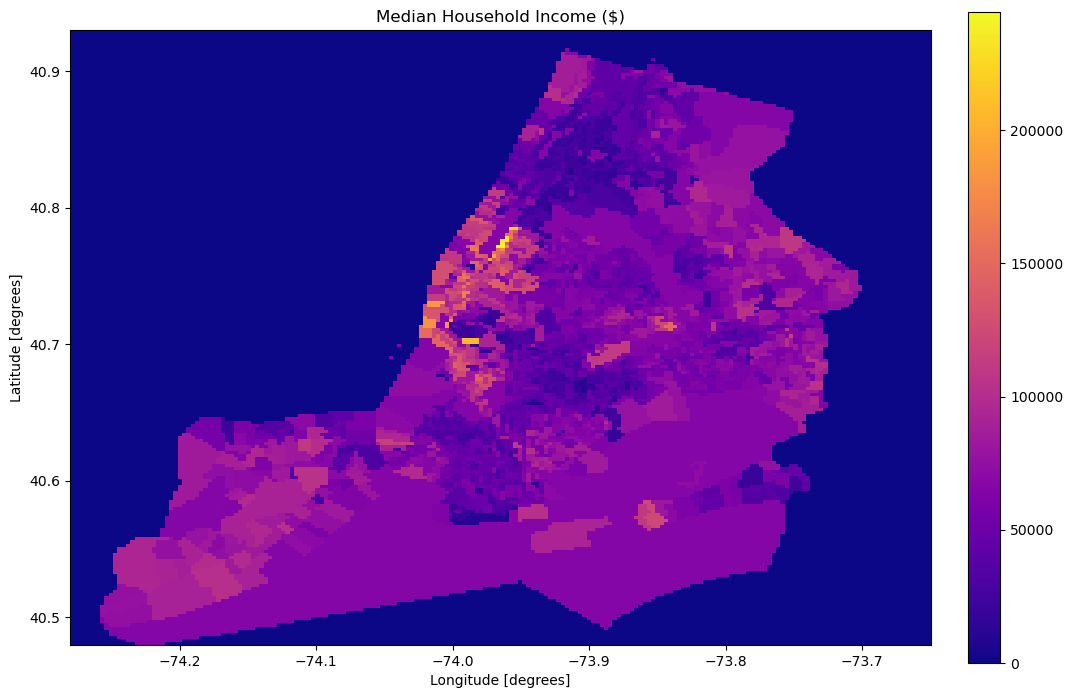

In [52]:
make_plot(blocks_map, blocks_map.Income,colors='plasma',title='Median Household Income ($)')

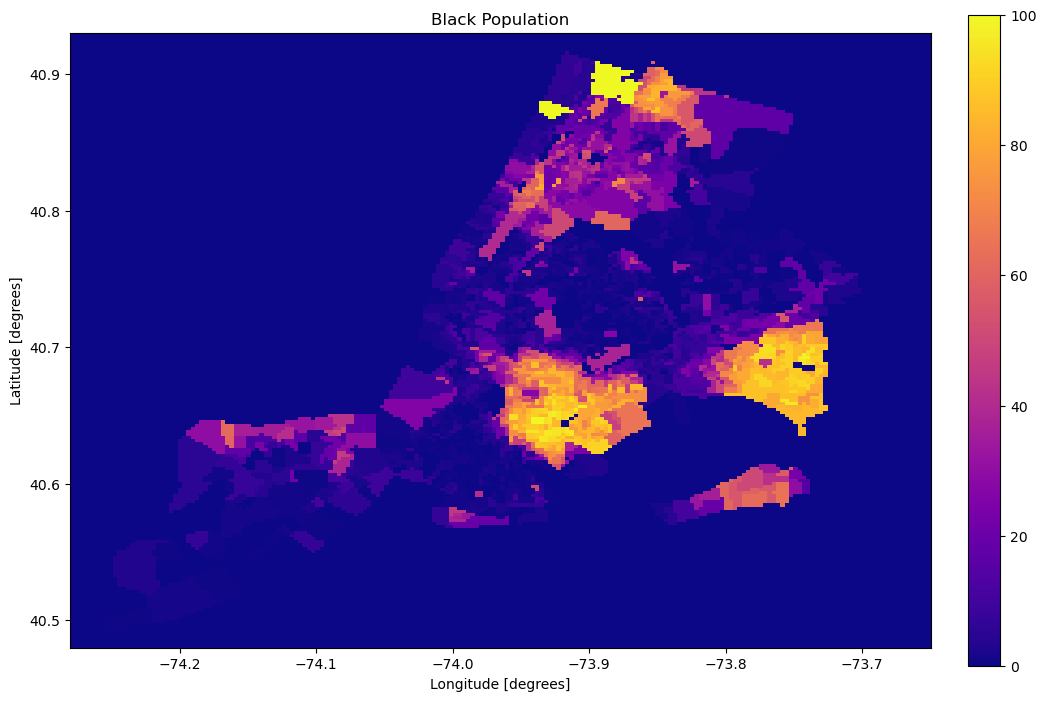

In [53]:
make_plot(blocks_map, blocks_map.Black,colors='plasma',title='Black Population')

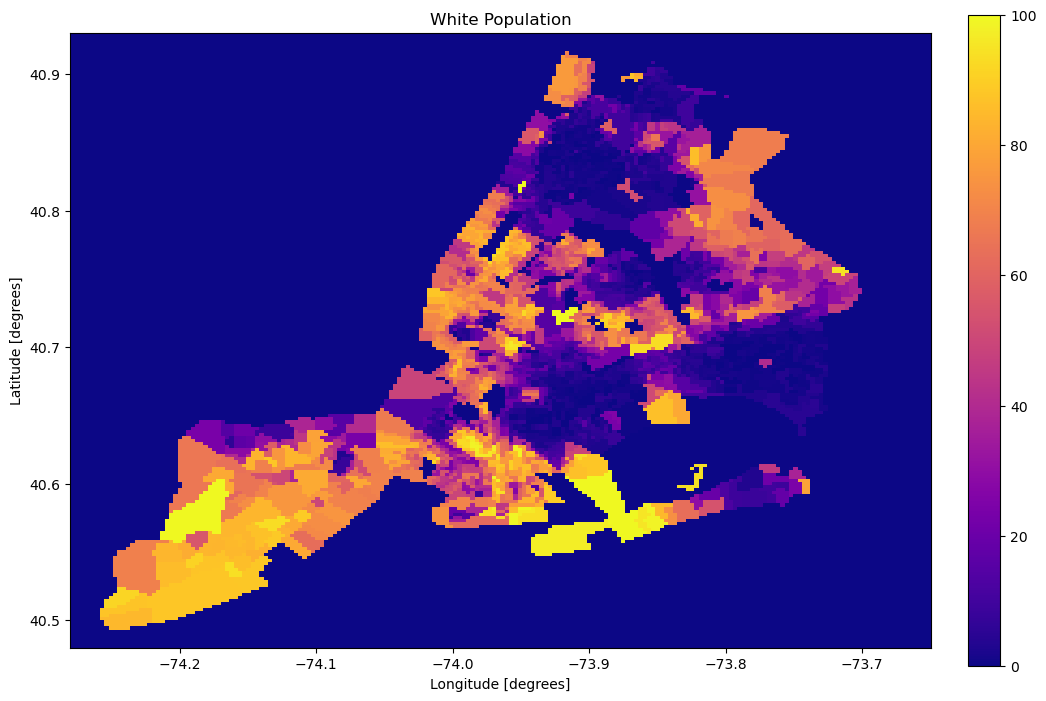

In [54]:
make_plot(blocks_map, blocks_map.White,colors='plasma',title='White Population')

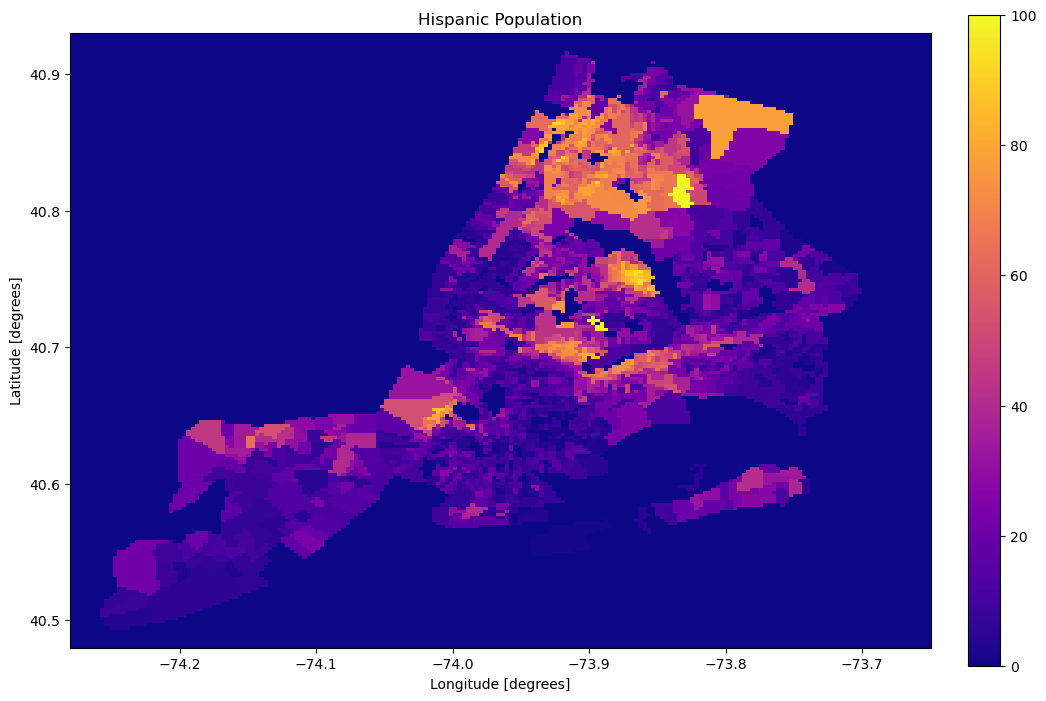

In [55]:
make_plot(blocks_map, blocks_map.Hispanic,colors='plasma',title='Hispanic Population')

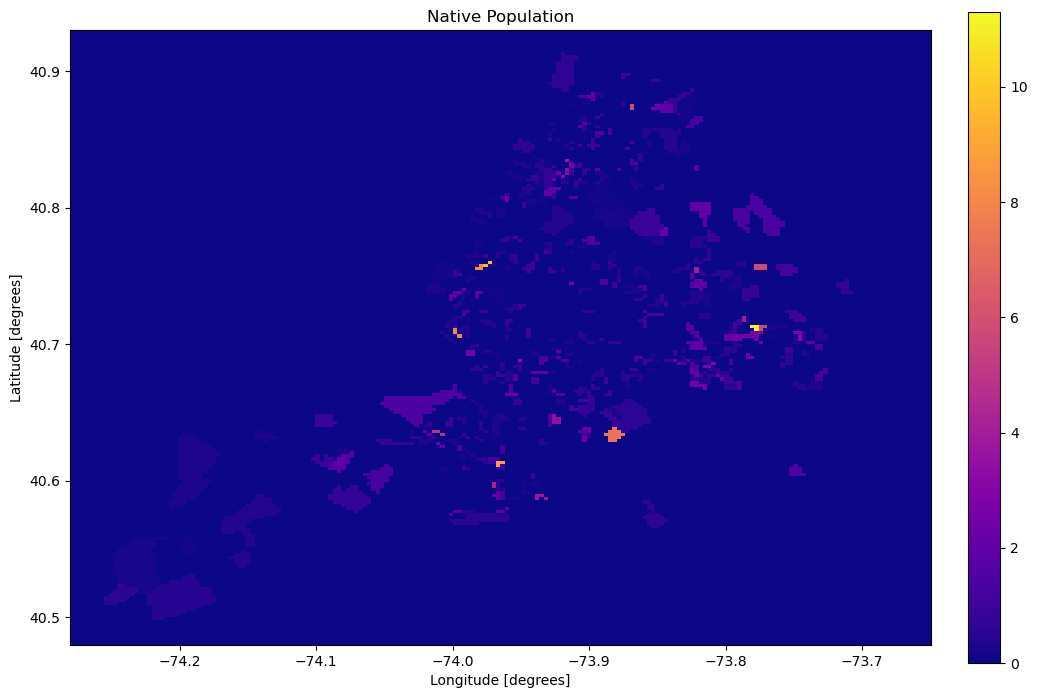

In [56]:
make_plot(blocks_map, blocks_map.Native,colors='plasma',title='Native Population')

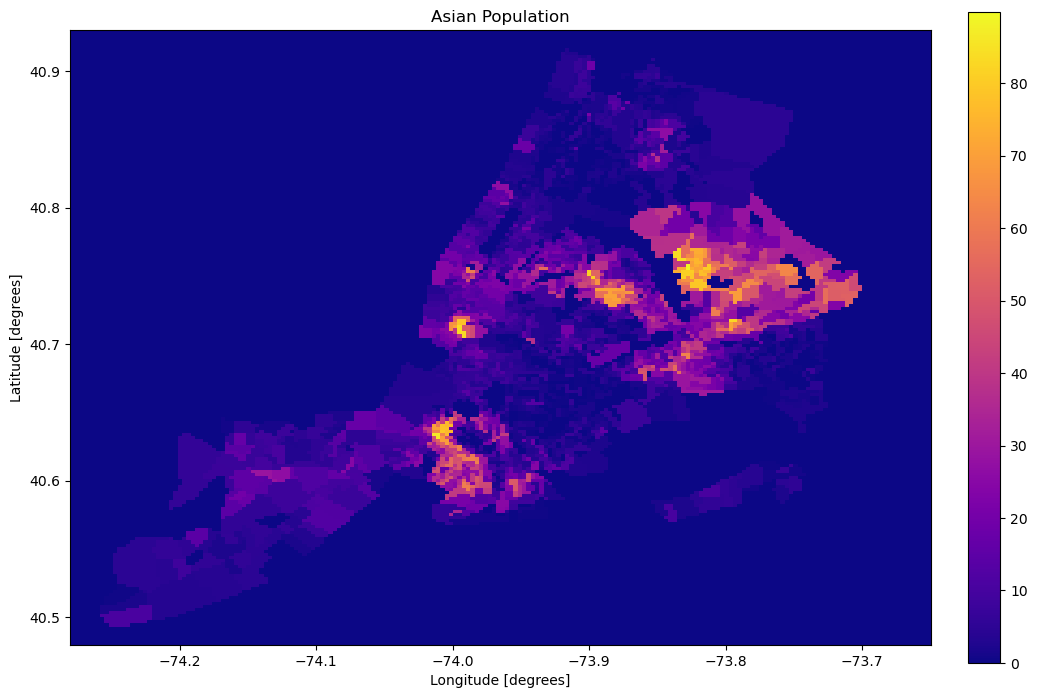

In [57]:
make_plot(blocks_map, blocks_map.Asian,colors='plasma',title='Asian Population')

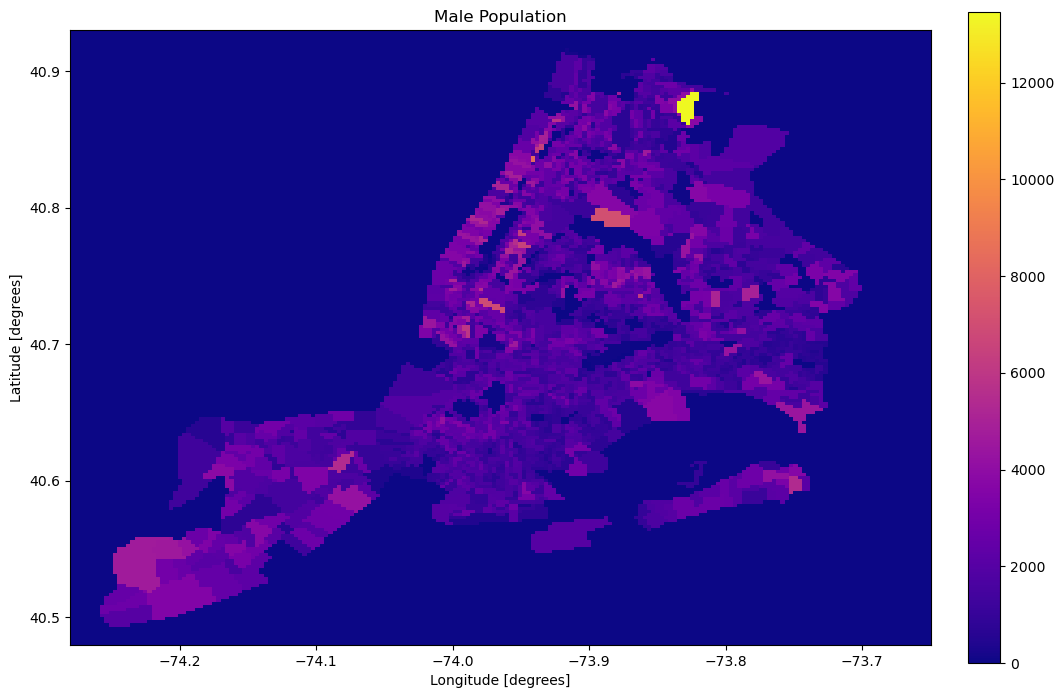

In [58]:
make_plot(blocks_map, blocks_map.Men,colors='plasma',title='Male Population')

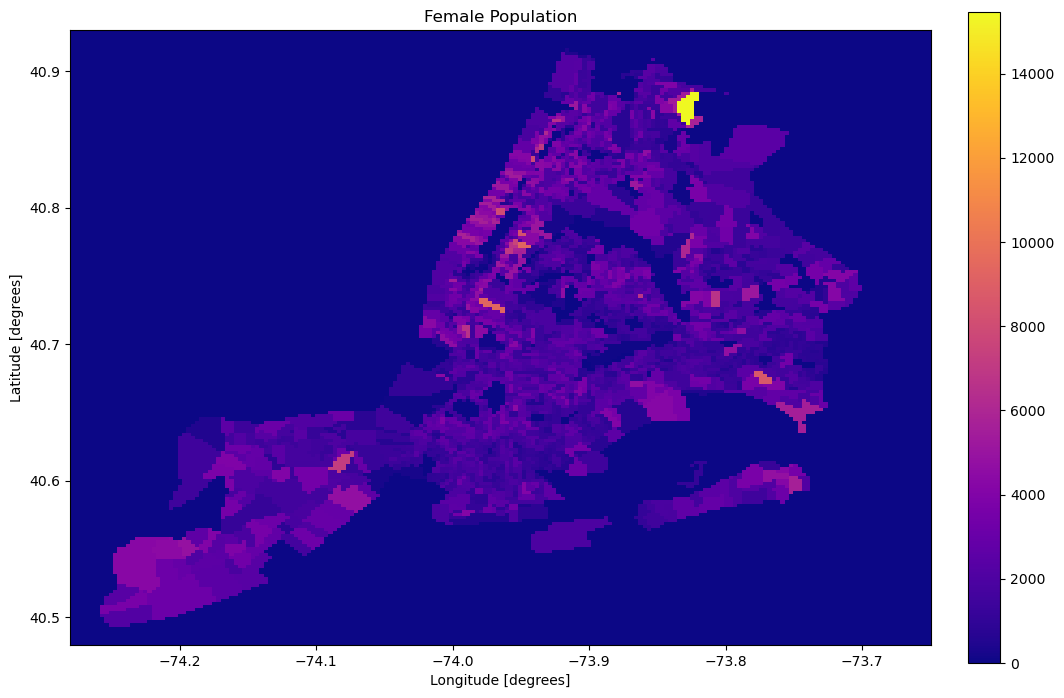

In [59]:
make_plot(blocks_map, blocks_map.Women,colors='plasma',title='Female Population')

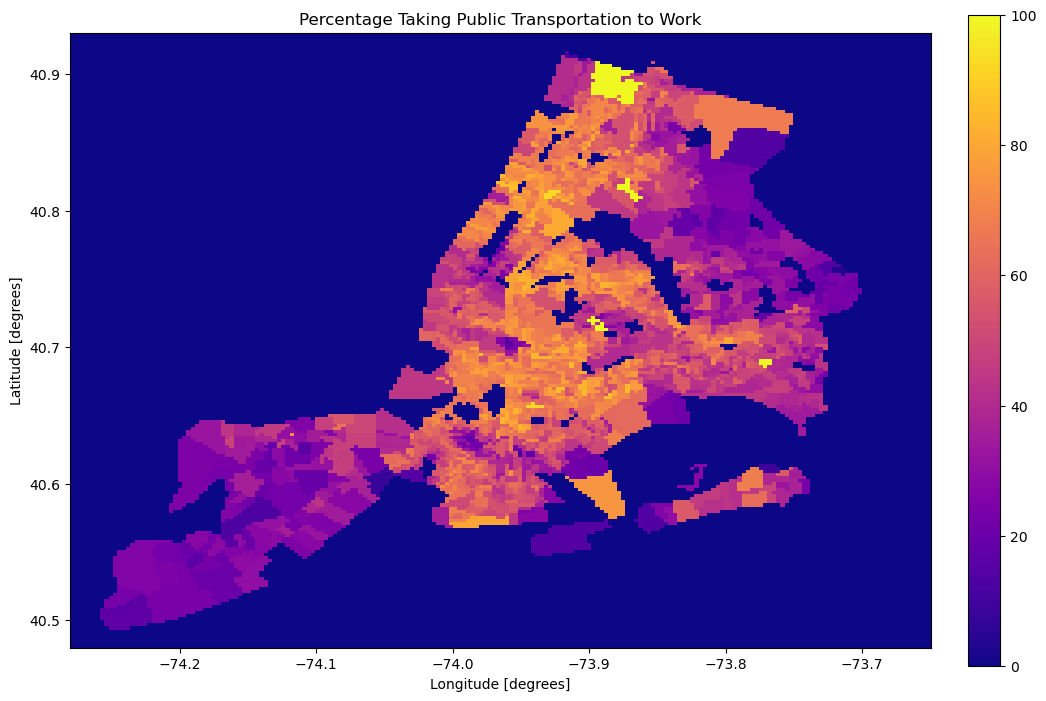

In [60]:
make_plot(blocks_map, blocks_map.Transit,colors='plasma',title='Percentage Taking Public Transportation to Work')

In [61]:
filtered_blocks = blocks_map[['Latitude', 'Longitude', 'BlockCode', 'County_x', 'Women', 'Men','White','Black','Hispanic','Asian','Native', 'TotalPop', 'Transit', 'Income']]


In [62]:
filtered_blocks['women_pop_perc'] = np.divide(np.array(filtered_blocks['Women'], int),np.array(filtered_blocks['TotalPop'],int))

<ipython-input-62-7eea9aa7a677>:1: RuntimeWarning: invalid value encountered in true_divide
  filtered_blocks['women_pop_perc'] = np.divide(np.array(filtered_blocks['Women'], int),np.array(filtered_blocks['TotalPop'],int))
<ipython-input-62-7eea9aa7a677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_blocks['women_pop_perc'] = np.divide(np.array(filtered_blocks['Women'], int),np.array(filtered_blocks['TotalPop'],int))


In [63]:
filtered_blocks['men_pop_perc'] = np.divide(np.array(filtered_blocks['Men'], int),np.array(filtered_blocks['TotalPop'],int))


<ipython-input-63-2779a392efd6>:1: RuntimeWarning: invalid value encountered in true_divide
  filtered_blocks['men_pop_perc'] = np.divide(np.array(filtered_blocks['Men'], int),np.array(filtered_blocks['TotalPop'],int))
<ipython-input-63-2779a392efd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_blocks['men_pop_perc'] = np.divide(np.array(filtered_blocks['Men'], int),np.array(filtered_blocks['TotalPop'],int))


In [64]:
filtered_blocks.describe()

,Latitude,Longitude,BlockCode,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
count,18053.000000,18053.000000,1.805300e+04,18052.000000,18052.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,18052.000000,12777.000000,18053.000000,13000.000000,13000.000000
mean,40.663945,-73.938191,3.606427e+14,1499.776091,1411.314591,42.815132,19.688084,23.607047,11.400839,0.184214,2911.090682,44.844486,66464.034737,0.513941,0.486136
std,0.108223,0.130486,2.647918e+11,1570.619628,1433.417834,33.096275,27.271547,21.308169,14.689430,0.592701,2963.959357,20.761257,21925.495078,0.101982,0.101993
min,40.480000,-74.257839,3.600500e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9829.000000,0.000000,0.000000
25%,40.572714,-74.020402,3.604707e+14,0.000000,0.000000,8.300000,0.900000,7.700000,2.100000,0.000000,0.000000,27.200000,57477.000000,0.489385,0.455085
50%,40.645075,-73.915930,3.608106e+14,1346.000000,1318.000000,44.600000,5.100000,16.600000,5.200000,0.000000,2627.000000,44.200000,66464.034737,0.515745,0.484255
75%,40.746834,-73.836784,3.608199e+14,2382.000000,2214.000000,71.200000,28.300000,32.100000,14.700000,0.000000,4586.000000,62.200000,75167.000000,0.544983,0.510615
max,40.916432,-73.700653,3.608599e+14,15466.000000,13460.000000,100.000000,100.000000,100.000000,89.800000,11.300000,28926.000000,100.000000,244375.000000,1.000000,1.000000


In [65]:
top_10 = data_stn.head(10)
top_10

,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total,Station_ID
Idx,,,,,,
0,7731245739475,8469095175735,9797926.0,12477488.0,22275414.0,34 ST-PENN STA
1,1588343826398,2588904833946,6915786.0,8179826.0,15095612.0,86 ST
2,5168226583243,6253939088433,6553769.0,8148549.0,14702318.0,34 ST-HERALD SQ
3,9395044648436,9451216086258,6781715.0,7698221.0,14479936.0,23 ST
4,3629918264598,3697243423910,5921551.0,8237261.0,14158812.0,GRD CNTRL-42 ST
5,10350578241404,7756601933674,6198335.0,7860103.0,14058438.0,125 ST
6,438250584272,298702831737,5695890.0,7959878.0,13655768.0,14 ST-UNION SQ
7,11490558443268,9964206014410,6456908.0,6359077.0,12815985.0,42 ST-PORT AUTH
8,5243796249011,6487265913276,5475206.0,7094043.0,12569249.0,FULTON ST


In [66]:
top_10['Latitude'] = [40.7520, 40.7794 , 40.7496, 40.7427, 40.7527, 40.8049, 40.4429, 40.7572, 40.7094, 40.7553 ]
top_10['Longitude'] = [-73.9933, -73.9555, -73.9877, -73.9926,-73.9772, -73.9385, -73.5914, -73.9898, -74.0083, -73.9869]

<ipython-input-66-17dae2135e85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Latitude'] = [40.7520, 40.7794 , 40.7496, 40.7427, 40.7527, 40.8049, 40.4429, 40.7572, 40.7094, 40.7553 ]
<ipython-input-66-17dae2135e85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Longitude'] = [-73.9933, -73.9555, -73.9877, -73.9926,-73.9772, -73.9385, -73.5914, -73.9898, -74.0083, -73.9869]


In [67]:
top_10

,ENTRIES,EXITS,Entry_Increment,Exits_Increment,Traffic_Total,Station_ID,Latitude,Longitude
Idx,,,,,,,,
0,7731245739475,8469095175735,9797926.0,12477488.0,22275414.0,34 ST-PENN STA,40.7520,-73.9933
1,1588343826398,2588904833946,6915786.0,8179826.0,15095612.0,86 ST,40.7794,-73.9555
2,5168226583243,6253939088433,6553769.0,8148549.0,14702318.0,34 ST-HERALD SQ,40.7496,-73.9877
3,9395044648436,9451216086258,6781715.0,7698221.0,14479936.0,23 ST,40.7427,-73.9926
4,3629918264598,3697243423910,5921551.0,8237261.0,14158812.0,GRD CNTRL-42 ST,40.7527,-73.9772
5,10350578241404,7756601933674,6198335.0,7860103.0,14058438.0,125 ST,40.8049,-73.9385
6,438250584272,298702831737,5695890.0,7959878.0,13655768.0,14 ST-UNION SQ,40.4429,-73.5914
7,11490558443268,9964206014410,6456908.0,6359077.0,12815985.0,42 ST-PORT AUTH,40.7572,-73.9898
8,5243796249011,6487265913276,5475206.0,7094043.0,12569249.0,FULTON ST,40.7094,-74.0083


1 - Demographics in half square mile around 34 - Penn St Station

In [68]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.753) & (filtered_blocks['Latitude'] > 40.751))&((filtered_blocks['Longitude']>-73.995)&(filtered_blocks['Longitude']<-73.991))]#.describe()

,Latitude,Longitude,BlockCode,County_x,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
22487,40.751357,-73.99191,360610101001002,New York,501.0,758.0,52.3,4.7,5.8,34.6,0.0,1259.0,41.1,159821.0,0.397935,0.602065


We notice the demographics in half square mile around 34 - Penn St Station as Follows:
 - Highest Median Household Income  ($ 159,821 per year)  (High income)
 - 60% of the population are males where 40% are females
 - 41% user public Transit

2 - Demographic in half square mile around 86 St 

40.7794	-73.9550

In [69]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.780) & (filtered_blocks['Latitude'] > 40.778))&((filtered_blocks['Longitude']>-73.957)&(filtered_blocks['Longitude']<-73.953))]#.describe()

,Latitude,Longitude,BlockCode,County_x,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
24899,40.778492,-73.95392,360610146011000,New York,2279.0,2184.0,79.1,1.1,5.4,11.0,1.3,4463.0,68.8,120257.0,0.510643,0.489357


We notice the demographics in half square mile around 86 Station as Follows:
 - Median Household Income  ($ 120,257 per year) 
 - 49% of the population are males where 51% are females
 - 68% user public Transit (High)

3 - Demographics in half square mile around 34 St - Herald Sq

In [70]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.750) & (filtered_blocks['Latitude'] > 40.747))&((filtered_blocks['Longitude']>-73.986)&(filtered_blocks['Longitude']<-73.984))]

,Latitude,Longitude,BlockCode,County_x,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
22289,40.749095,-73.985578,360610076001000,New York,1069.0,843.0,45.8,2.6,2.8,46.6,0.4,1912.0,36.5,103264.0,0.5591,0.4409


We notice the demographics in half square mile around 34 St - Herald Sq Station as Follows:
 - Median Household Income  ($ 103,264 per year) 
 - 44% of the population are males where 56% are females
 - 36% user public Transit

4 - Demographics in half square around 23 St Station

In [71]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.755) & (filtered_blocks['Latitude'] > 40.753))&((filtered_blocks['Longitude']>-73.993)&(filtered_blocks['Longitude']<-73.991))]#.describe()

,Latitude,Longitude,BlockCode,County_x,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
22687,40.753618,-73.99191,360610109001003,New York,113.0,73.0,58.1,10.2,1.1,27.4,0.0,186.0,48.4,135750.0,0.607527,0.392473


We notice the demographics in half square mile around 23 St Station as Follows:
 - Median Household Income  ($ 135,575 per year) 
 - 40% of the population are males where 60% are females
 - 48% user public Transit

5 - Demographics in half square mile around Grand Central 42nd St

In [72]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.754) & (filtered_blocks['Latitude'] > 40.752))&((filtered_blocks['Longitude']>-73.977)&(filtered_blocks['Longitude']<-73.976))]

,Latitude,Longitude,BlockCode,County_x,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
22692,40.753618,-73.97608,360610092001008,New York,895.0,822.0,75.7,2.0,5.4,16.0,0.0,1717.0,37.2,122379.0,0.521258,0.478742


We notice the demographics in half square mile around Grand Central 42nd St Station as Follows:
 - Highest Median Household Income  ($ 122,379 per year) 
 - 48% of the population are males where 52% are females
 - 37% user public Transit

6 - Demographic in half square mile around 125th ST

40.8049	-73.9385

In [73]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.805) & (filtered_blocks['Latitude'] > 40.803))&((filtered_blocks['Longitude']>-73.941)&(filtered_blocks['Longitude']<-73.935))]

,Latitude,Longitude,BlockCode,County_x,Women,Men,White,Black,Hispanic,Asian,Native,TotalPop,Transit,Income,women_pop_perc,men_pop_perc
27104,40.803367,-73.93809,360610196003004,New York,2219.0,2108.0,9.7,29.2,48.9,5.1,0.0,4327.0,80.2,19045.0,0.512826,0.487174


We notice the demographics in half square mile around 23 St Station as Follows:
 - Median Household Income  ($ 19,045 per year) 
 - 49% of the population are males where 51% are females
 - 80% user public Transit (Highest)

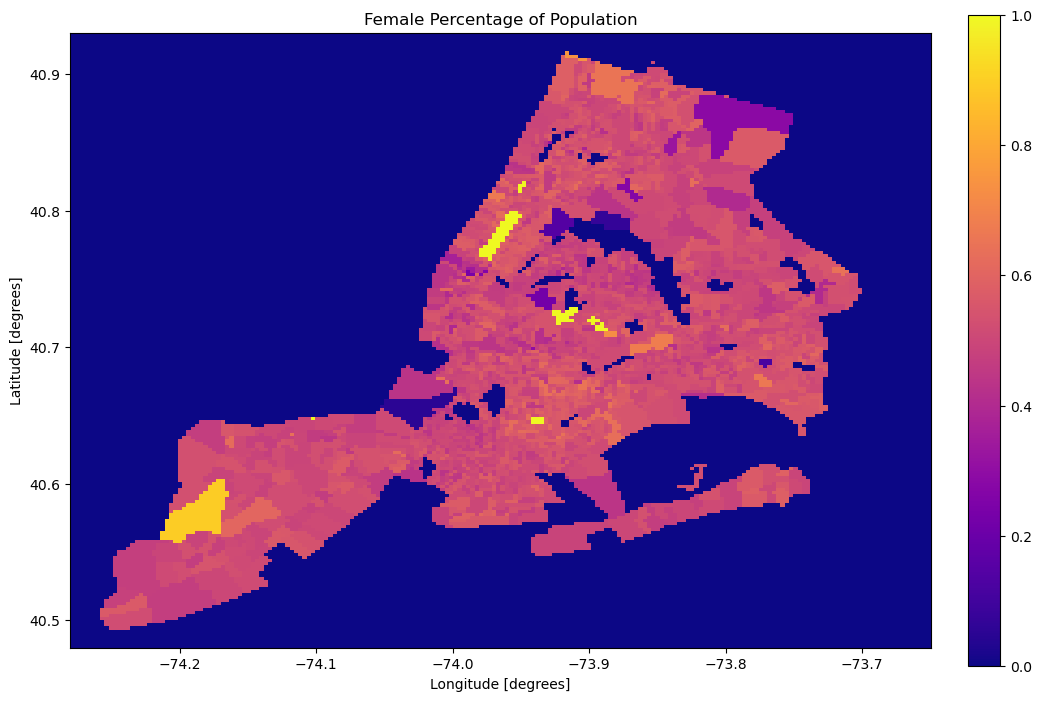

In [74]:
make_plot(filtered_blocks, filtered_blocks.women_pop_perc,colors='plasma',title='Female Percentage of Population')

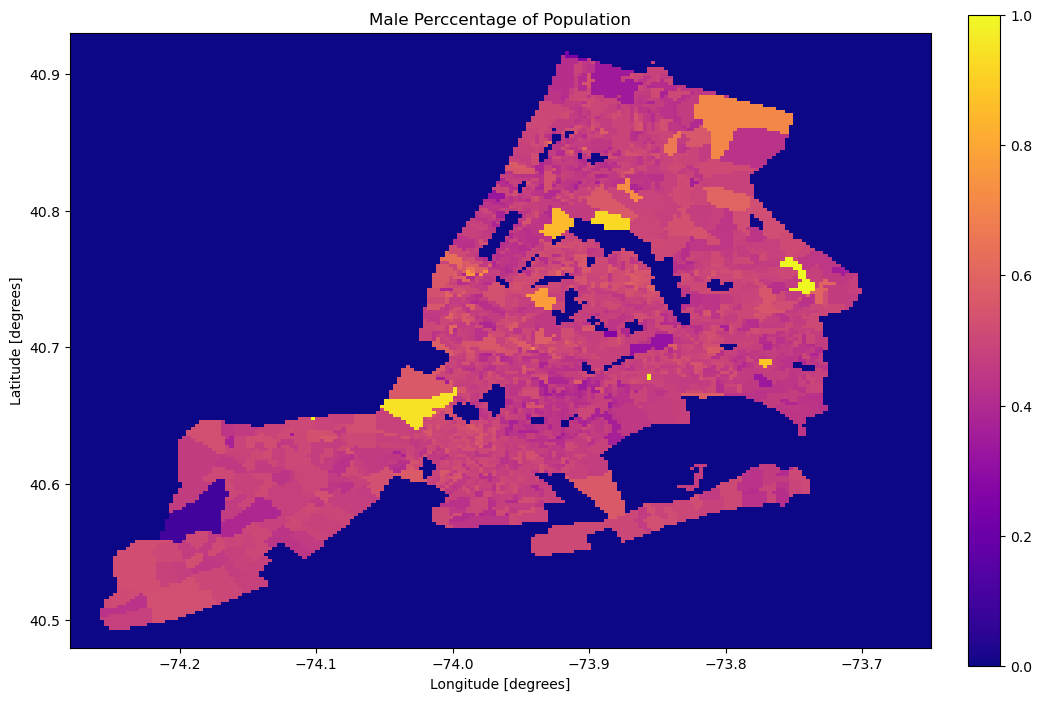

In [75]:
make_plot(filtered_blocks, filtered_blocks.men_pop_perc,colors='plasma',title='Male Perccentage of Population')